In [4]:
!pip install pandas
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


ANÁLISIS COMPARATIVO: PREDICCIÓN DE CALIDAD DEL SUEÑO
Random Forest vs SVM vs KNN

📊 Información del dataset:
   - Muestras totales: 500
   - Features: 10
   - Clases: [0 1 2] (Baja, Media, Alta)
   - Distribución: [169 167 164]
   - Train: 400 muestras
   - Test:  100 muestras (para evaluación final)

PARTE 1: CONFIGURACIÓN DE MODELOS

PARTE 2: CROSS-VALIDATION (5-FOLD)

🔍 Evaluando Random Forest...
   Resultados (mean ± std):
   accuracy       : Train 0.996±0.003 | CV 0.890±0.035 | Gap 0.106
   precision_macro: Train 0.996±0.003 | CV 0.896±0.032 | Gap 0.100
   recall_macro   : Train 0.996±0.003 | CV 0.890±0.034 | Gap 0.106
   f1_macro       : Train 0.996±0.003 | CV 0.890±0.034 | Gap 0.105

🔍 Evaluando SVM...
   Resultados (mean ± std):
   accuracy       : Train 0.963±0.005 | CV 0.945±0.024 | Gap 0.017
   precision_macro: Train 0.963±0.005 | CV 0.946±0.024 | Gap 0.017
   recall_macro   : Train 0.963±0.005 | CV 0.945±0.024 | Gap 0.018
   f1_macro       : Train 0.962±0.005 | CV 0.945±0.

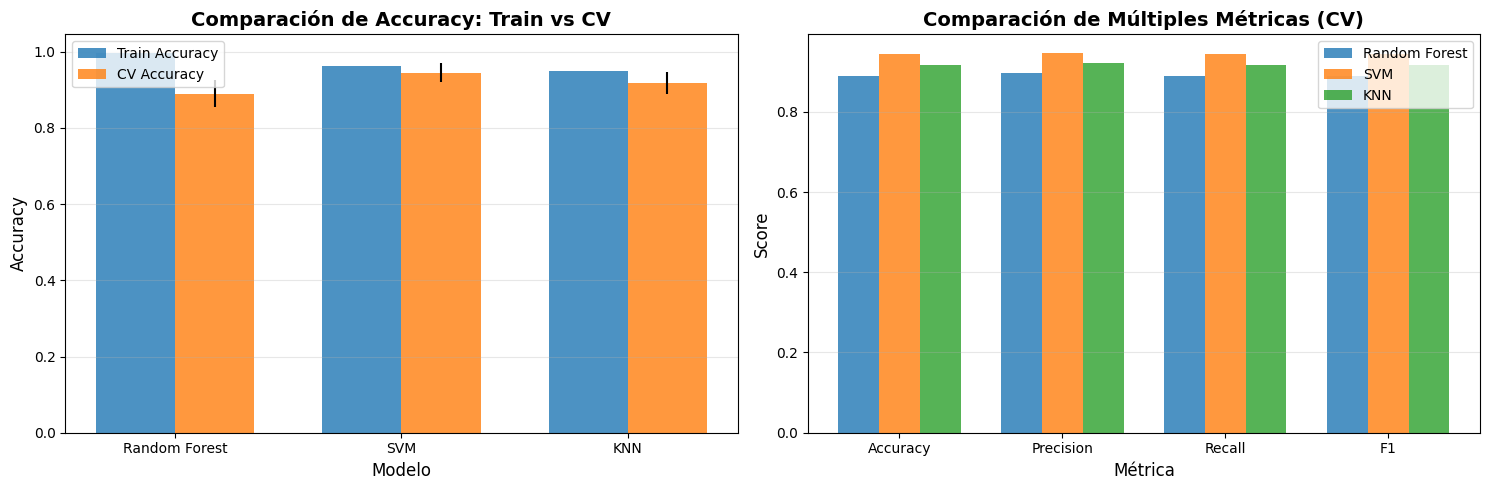


PARTE 3: LEARNING CURVES

📈 Calculando learning curve para Random Forest...
   Train final: 0.996
   CV final:    0.890
   Gap:         0.106
   ✅ Buen balance

📈 Calculando learning curve para SVM...
   Train final: 0.963
   CV final:    0.945
   Gap:         0.017
   ✅ Buen balance

📈 Calculando learning curve para KNN...
   Train final: 0.949
   CV final:    0.918
   Gap:         0.032
   ✅ Buen balance


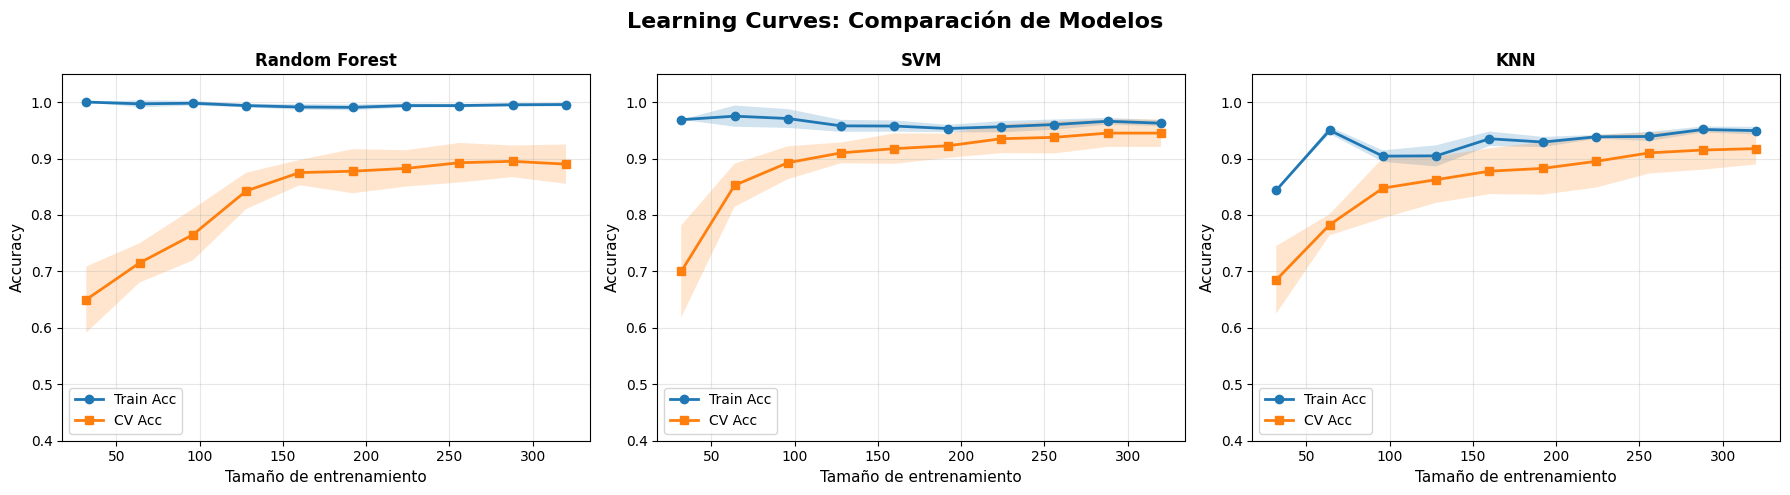


PARTE 4: GRID SEARCH - OPTIMIZACIÓN DE HIPERPARÁMETROS

🔧 Optimizando Random Forest...
   Mejores parámetros: {'clf__max_depth': 15, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
   Mejor CV score: 0.9025

🔧 Optimizando SVM...
   Mejores parámetros: {'clf__C': 1, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
   Mejor CV score: 0.9450

🔧 Optimizando KNN...
   Mejores parámetros: {'clf__metric': 'euclidean', 'clf__n_neighbors': 3, 'clf__weights': 'distance'}
   Mejor CV score: 0.9350

PARTE 5: EVALUACIÓN FINAL EN TEST SET (datos NO vistos)

📊 Random Forest - RESULTADOS FINALES

📈 Métricas Globales:
   Accuracy:  0.9300
   Precision: 0.9325
   Recall:    0.9293
   F1-Score:  0.9281

📋 Reporte por clase:
              precision    recall  f1-score   support

        Baja       0.92      1.00      0.96        34
       Media       0.96      0.82      0.89        33
        Alta       0.91      0.97      0.94        33

    accuracy                           0.93       100
   macro avg 

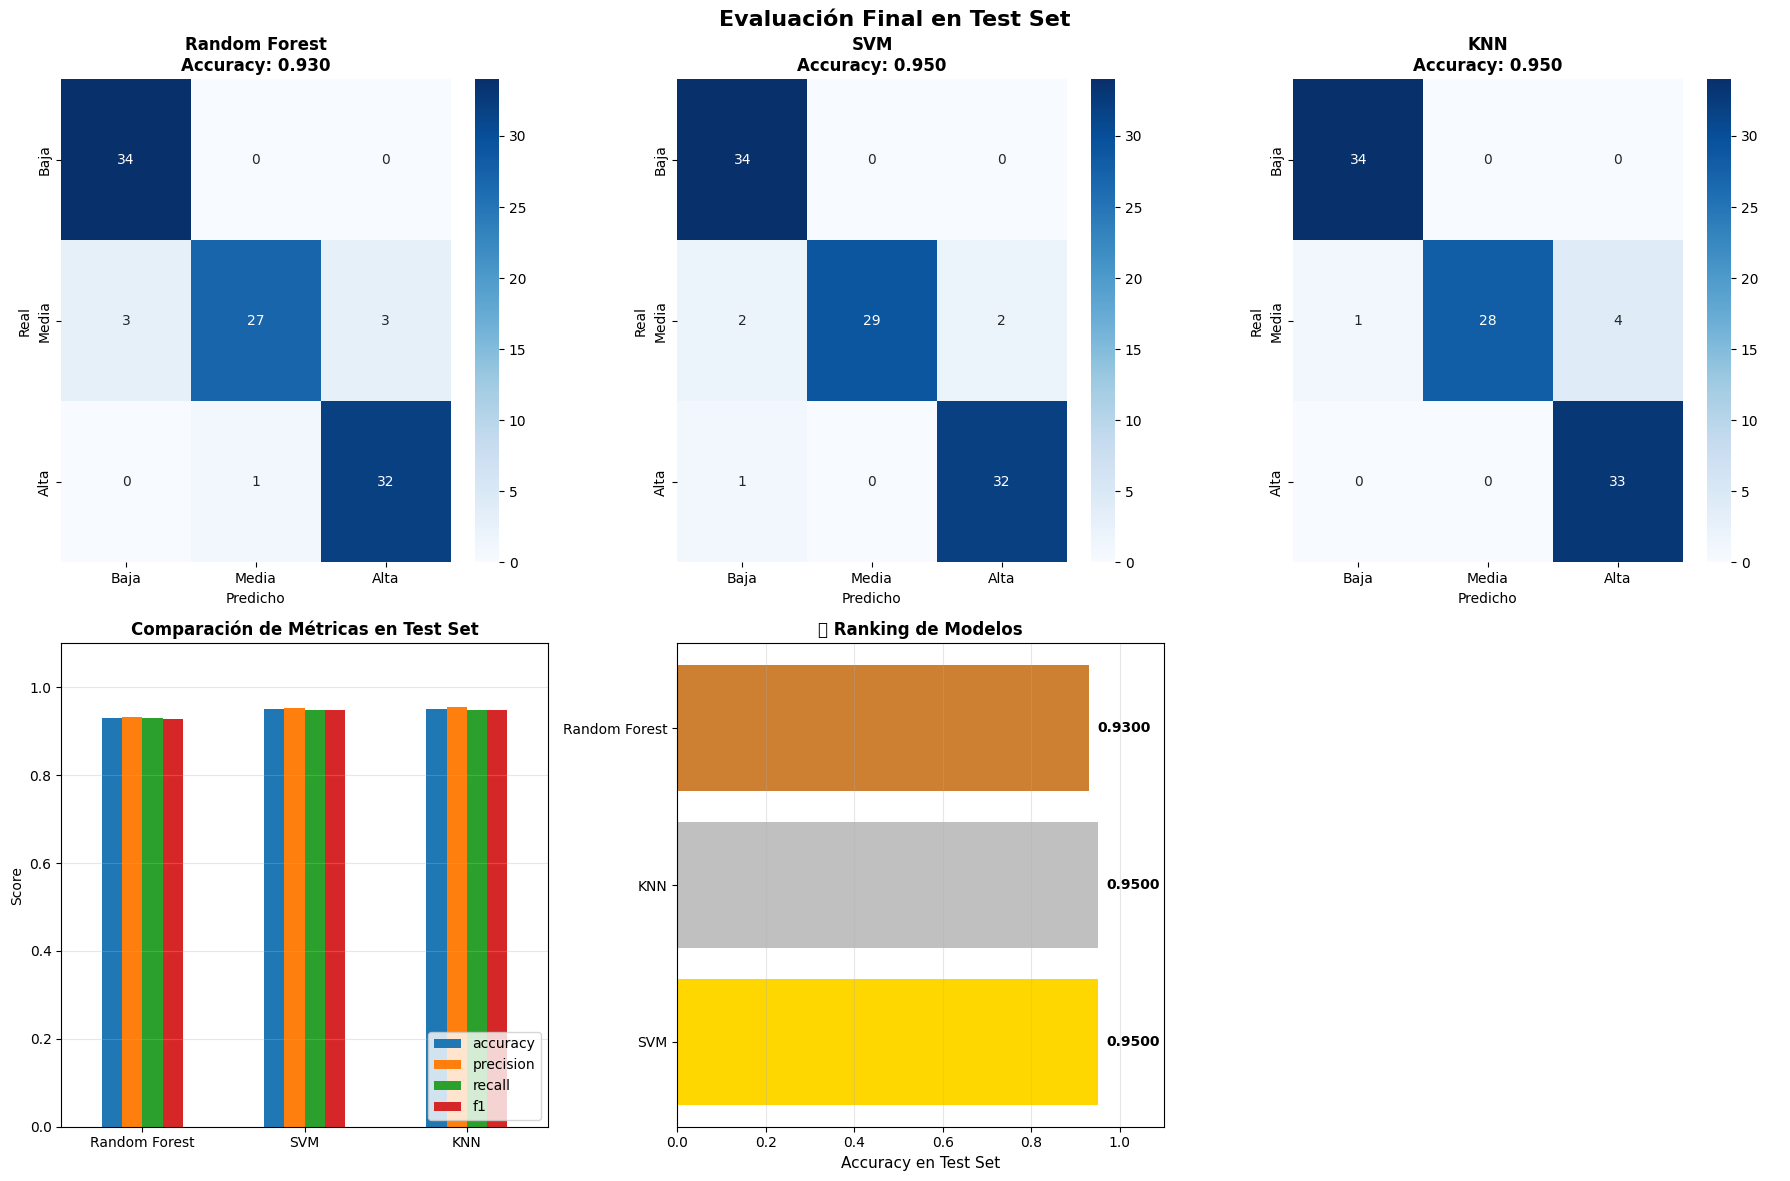


🏆 RESUMEN FINAL Y RECOMENDACIONES

✅ MEJOR MODELO: SVM
   - Accuracy en Test: 0.9500
   - F1-Score: 0.9495

📊 Características de cada modelo:

🌲 Random Forest:
   + Robusto, maneja bien datos no lineales
   + Menos propenso a overfitting
   + Puede manejar features categóricas y numéricas
   - Puede ser lento con muchos árboles

🎯 SVM:
   + Excelente para datos de alta dimensionalidad
   + Kernel RBF captura relaciones no lineales
   + Buena generalización con C y gamma apropiados
   - Requiere escalado de datos
   - Sensible a hiperparámetros

👥 KNN:
   + Simple e interpretable
   + No requiere entrenamiento
   + Bueno para patrones locales
   - Lento en predicción con muchos datos
   - Sensible a features irrelevantes

PRÓXIMOS PASOS SUGERIDOS:

1. 📊 Feature Engineering: Analiza qué features son más importantes
2. 🔍 Feature Selection: Elimina features redundantes
3. ⚖️  Balance de clases: Si hay desbalance, considera SMOTE o class_weight
4. 🎯 Ensemble: Combina los mejores modelos (V

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (
    cross_val_score, 
    cross_validate, 
    learning_curve,
    GridSearchCV,
    train_test_split
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support
)
import warnings
warnings.filterwarnings('ignore')

# ============================================
# CONFIGURACIÓN Y CARGA DE DATOS
# ============================================
print("=" * 80)
print("ANÁLISIS COMPARATIVO: PREDICCIÓN DE CALIDAD DEL SUEÑO")
print("Random Forest vs SVM vs KNN")
print("=" * 80)

# REEMPLAZA ESTO CON TUS DATOS REALES
# Ejemplo de cómo cargar tus datos:
# df = pd.read_csv('tu_archivo.csv')
# X = df.drop('calidad_sueño', axis=1)  # Features
# y = df['calidad_sueño']                # Target (Baja=0, Media=1, Alta=2)

# Datos de ejemplo (ELIMINA ESTO y usa tus datos reales)
np.random.seed(42)
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=500, n_features=10, n_informative=8,
    n_redundant=2, n_classes=3, n_clusters_per_class=1,
    random_state=42
)

print(f"\n📊 Información del dataset:")
print(f"   - Muestras totales: {len(X)}")
print(f"   - Features: {X.shape[1]}")
print(f"   - Clases: {np.unique(y)} (Baja, Media, Alta)")
print(f"   - Distribución: {np.bincount(y)}")

# Split train/test (guardamos test para evaluación final)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"   - Train: {len(X_train)} muestras")
print(f"   - Test:  {len(X_test)} muestras (para evaluación final)")

# ============================================
# PARTE 1: DEFINIR MODELOS
# ============================================
print("\n" + "=" * 80)
print("PARTE 1: CONFIGURACIÓN DE MODELOS")
print("=" * 80)

models = {
    'Random Forest': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                random_state=42
            ))
        ]),
        'params': {
            'clf__n_estimators': [50, 100, 200],
            'clf__max_depth': [5, 10, 15, None],
            'clf__min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(random_state=42))
        ]),
        'params': {
            'clf__C': [0.1, 1, 10, 100],
            'clf__gamma': [0.001, 0.01, 0.1, 1],
            'clf__kernel': ['rbf', 'linear']
        }
    },
    'KNN': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', KNeighborsClassifier())
        ]),
        'params': {
            'clf__n_neighbors': [3, 5, 7, 11, 15],
            'clf__weights': ['uniform', 'distance'],
            'clf__metric': ['euclidean', 'manhattan']
        }
    }
}

# ============================================
# PARTE 2: CROSS-VALIDATION COMPARATIVA
# ============================================
print("\n" + "=" * 80)
print("PARTE 2: CROSS-VALIDATION (5-FOLD)")
print("=" * 80)

cv_results = {}

for name, config in models.items():
    print(f"\n🔍 Evaluando {name}...")
    
    # Métricas múltiples
    scoring = {
        'accuracy': 'accuracy',
        'precision_macro': 'precision_macro',
        'recall_macro': 'recall_macro',
        'f1_macro': 'f1_macro'
    }
    
    scores = cross_validate(
        config['model'], X_train, y_train,
        cv=5,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1
    )
    
    cv_results[name] = scores
    
    print(f"   Resultados (mean ± std):")
    for metric in ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']:
        train_mean = scores[f'train_{metric}'].mean()
        train_std = scores[f'train_{metric}'].std()
        test_mean = scores[f'test_{metric}'].mean()
        test_std = scores[f'test_{metric}'].std()
        gap = train_mean - test_mean
        
        print(f"   {metric:15s}: Train {train_mean:.3f}±{train_std:.3f} | "
              f"CV {test_mean:.3f}±{test_std:.3f} | Gap {gap:.3f}")

# Tabla comparativa
print("\n" + "=" * 80)
print("TABLA COMPARATIVA - CV ACCURACY")
print("=" * 80)
comparison_df = pd.DataFrame({
    name: {
        'CV Accuracy': f"{cv_results[name]['test_accuracy'].mean():.4f}",
        'CV Std': f"{cv_results[name]['test_accuracy'].std():.4f}",
        'Train Accuracy': f"{cv_results[name]['train_accuracy'].mean():.4f}",
        'Gap': f"{cv_results[name]['train_accuracy'].mean() - cv_results[name]['test_accuracy'].mean():.4f}"
    }
    for name in models.keys()
})
print(comparison_df.T)

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Accuracy comparison
ax = axes[0]
model_names = list(cv_results.keys())
train_accs = [cv_results[m]['train_accuracy'].mean() for m in model_names]
test_accs = [cv_results[m]['test_accuracy'].mean() for m in model_names]
test_stds = [cv_results[m]['test_accuracy'].std() for m in model_names]

x = np.arange(len(model_names))
width = 0.35

ax.bar(x - width/2, train_accs, width, label='Train Accuracy', alpha=0.8)
ax.bar(x + width/2, test_accs, width, label='CV Accuracy', alpha=0.8, yerr=test_stds)
ax.set_xlabel('Modelo', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Comparación de Accuracy: Train vs CV', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Subplot 2: Multiple metrics
ax = axes[1]
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
x = np.arange(len(metrics))
width = 0.25

for i, name in enumerate(model_names):
    values = [cv_results[name][f'test_{m}'].mean() for m in metrics]
    ax.bar(x + i*width, values, width, label=name, alpha=0.8)

ax.set_xlabel('Métrica', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparación de Múltiples Métricas (CV)', fontsize=14, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================
# PARTE 3: LEARNING CURVES
# ============================================
print("\n" + "=" * 80)
print("PARTE 3: LEARNING CURVES")
print("=" * 80)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Learning Curves: Comparación de Modelos', fontsize=16, fontweight='bold')

for idx, (name, config) in enumerate(models.items()):
    print(f"\n📈 Calculando learning curve para {name}...")
    ax = axes[idx]
    
    train_sizes, train_scores, val_scores = learning_curve(
        config['model'], X_train, y_train,
        cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)
    
    ax.plot(train_sizes, train_mean, 'o-', label='Train Acc', linewidth=2)
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    
    ax.plot(train_sizes, val_mean, 's-', label='CV Acc', linewidth=2)
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
    
    ax.set_xlabel('Tamaño de entrenamiento', fontsize=11)
    ax.set_ylabel('Accuracy', fontsize=11)
    ax.set_title(name, fontsize=12, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0.4, 1.05])
    
    gap = train_mean[-1] - val_mean[-1]
    print(f"   Train final: {train_mean[-1]:.3f}")
    print(f"   CV final:    {val_mean[-1]:.3f}")
    print(f"   Gap:         {gap:.3f}")
    
    # Diagnóstico
    if gap > 0.15:
        print(f"   ⚠️  Posible OVERFITTING (gap > 0.15)")
    elif val_mean[-1] < 0.70:
        print(f"   ⚠️  Posible UNDERFITTING (CV < 0.70)")
    else:
        print(f"   ✅ Buen balance")

plt.tight_layout()
plt.show()

# ============================================
# PARTE 4: OPTIMIZACIÓN DE HIPERPARÁMETROS
# ============================================
print("\n" + "=" * 80)
print("PARTE 4: GRID SEARCH - OPTIMIZACIÓN DE HIPERPARÁMETROS")
print("=" * 80)

best_models = {}

for name, config in models.items():
    print(f"\n🔧 Optimizando {name}...")
    
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    
    print(f"   Mejores parámetros: {grid_search.best_params_}")
    print(f"   Mejor CV score: {grid_search.best_score_:.4f}")

# ============================================
# PARTE 5: EVALUACIÓN FINAL EN TEST SET
# ============================================
print("\n" + "=" * 80)
print("PARTE 5: EVALUACIÓN FINAL EN TEST SET (datos NO vistos)")
print("=" * 80)

test_results = {}

for name, model in best_models.items():
    print(f"\n{'='*80}")
    print(f"📊 {name} - RESULTADOS FINALES")
    print(f"{'='*80}")
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average='macro'
    )
    
    test_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    print(f"\n📈 Métricas Globales:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    
    # Reporte por clase
    print(f"\n📋 Reporte por clase:")
    print(classification_report(
        y_test, y_pred,
        target_names=['Baja', 'Media', 'Alta']
    ))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n🔲 Matriz de Confusión:")
    print(cm)

# Visualización final
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Evaluación Final en Test Set', fontsize=16, fontweight='bold')

# Matrices de confusión
for idx, (name, model) in enumerate(best_models.items()):
    ax = axes[0, idx]
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Baja', 'Media', 'Alta'],
                yticklabels=['Baja', 'Media', 'Alta'])
    ax.set_title(f'{name}\nAccuracy: {test_results[name]["accuracy"]:.3f}',
                 fontweight='bold')
    ax.set_ylabel('Real')
    ax.set_xlabel('Predicho')

# Comparación de métricas
ax = axes[1, 0]
metrics_df = pd.DataFrame(test_results).T
metrics_df.plot(kind='bar', ax=ax, rot=0)
ax.set_title('Comparación de Métricas en Test Set', fontweight='bold')
ax.set_ylabel('Score')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1.1])

# Ranking de modelos
ax = axes[1, 1]
ranking = sorted(test_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)
names = [r[0] for r in ranking]
scores = [r[1]['accuracy'] for r in ranking]
colors = ['gold', 'silver', '#CD7F32']

bars = ax.barh(names, scores, color=colors)
ax.set_xlabel('Accuracy en Test Set', fontsize=11)
ax.set_title('🏆 Ranking de Modelos', fontweight='bold', fontsize=12)
ax.set_xlim([0, 1.1])
for i, (bar, score) in enumerate(zip(bars, scores)):
    ax.text(score + 0.02, i, f'{score:.4f}', va='center', fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Ocultar subplot vacío
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# ============================================
# RESUMEN FINAL
# ============================================
print("\n" + "=" * 80)
print("🏆 RESUMEN FINAL Y RECOMENDACIONES")
print("=" * 80)

best_model_name = max(test_results, key=lambda k: test_results[k]['accuracy'])
print(f"\n✅ MEJOR MODELO: {best_model_name}")
print(f"   - Accuracy en Test: {test_results[best_model_name]['accuracy']:.4f}")
print(f"   - F1-Score: {test_results[best_model_name]['f1']:.4f}")

print("\n📊 Características de cada modelo:\n")
print("🌲 Random Forest:")
print("   + Robusto, maneja bien datos no lineales")
print("   + Menos propenso a overfitting")
print("   + Puede manejar features categóricas y numéricas")
print("   - Puede ser lento con muchos árboles")

print("\n🎯 SVM:")
print("   + Excelente para datos de alta dimensionalidad")
print("   + Kernel RBF captura relaciones no lineales")
print("   + Buena generalización con C y gamma apropiados")
print("   - Requiere escalado de datos")
print("   - Sensible a hiperparámetros")

print("\n👥 KNN:")
print("   + Simple e interpretable")
print("   + No requiere entrenamiento")
print("   + Bueno para patrones locales")
print("   - Lento en predicción con muchos datos")
print("   - Sensible a features irrelevantes")

print("\n" + "=" * 80)
print("PRÓXIMOS PASOS SUGERIDOS:")
print("=" * 80)
print("""
1. 📊 Feature Engineering: Analiza qué features son más importantes
2. 🔍 Feature Selection: Elimina features redundantes
3. ⚖️  Balance de clases: Si hay desbalance, considera SMOTE o class_weight
4. 🎯 Ensemble: Combina los mejores modelos (Voting Classifier)
5. 📈 Más datos: Si hay underfitting, considera recolectar más datos
6. 🧪 Validación cruzada estratificada: Para datasets pequeños
""")